# Autoencoders
- Objetivo: comprender el funcionamiento de los autoencoders en el procesamiento de imágenes y aplicarlos para reconstruir imágenes

https://blog.keras.io/building-autoencoders-in-keras.html

- Modelo que transforma una dimensión a una dimensión codificada para después reconstruir los datos
- Usada para eliminar ruido, principio de los modelos ent-to-end o seq-to-seq

![Autoencoder](img/2.png)
Un autoencoder consiste en un 'encoder' que codifica la entrada a una dimensión indicada y un 'decoder' el cual genera la entrada a partir de la codificación del encoder.

    
    
- Tipos de datos a los que se aplican autoencoders:
    - Imagenes
    - Audio
    - Video
    
Un autoencoder aprende una distribución de los datos para despúes generarlos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

mnist = keras.datasets.mnist
 


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

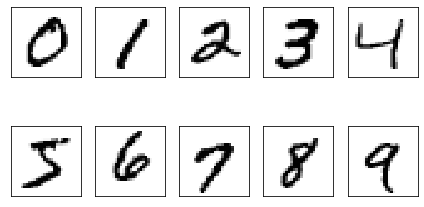

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Modelo de autoencoder
- Autoencoder con una sola capa oculta
- Se define la dimensión a codificar, en este caso d=10

In [5]:
epoch = 5
verbose = 1
batch = 50

- Indicar dimensión de codificación

In [6]:
d = 10

In [7]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(d, activation="relu"),
])

decoder = keras.models.Sequential([
    keras.layers.Dense(28 * 28, activation="sigmoid", input_shape=[d]),

    keras.layers.Reshape((28, 28))
])

model = keras.models.Sequential([encoder, decoder])

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 10)                7850      
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28)            8624      
Total params: 16,474
Trainable params: 16,474
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

model.fit(x_train, x_train, epochs=epoch)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2082 - accuracy: 0.7959
Epoch 2/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1646 - accuracy: 0.8029
Epoch 3/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1596 - accuracy: 0.8042
Epoch 4/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1572 - accuracy: 0.8048
Epoch 5/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1560 - accuracy: 0.8051


In [10]:
decoded_imgs = model.predict(x_test[:5])

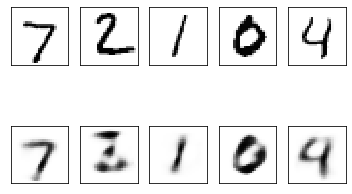

In [11]:
n = 5
for i in range(n):
    # instancias de prueba
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='Greys', interpolation='nearest')

    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # reconstrucción
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28,28),cmap='Greys', )
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



## Deep Autoencoder
- Los Autoencoders generalmente son profundos y pueden estar conformados por diferentes tipos de capas

![Deep Autoencoder](img/3.png)

In [12]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(d, activation="relu"),
])

decoder = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu", input_shape=[d]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape((28, 28))
])

model = keras.models.Sequential([encoder, decoder])

In [13]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 10)                39760     
_________________________________________________________________
sequential_4 (Sequential)    (None, 28, 28)            40534     
Total params: 80,294
Trainable params: 80,294
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

model.fit(x_train, x_train, epochs=epoch)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1864 - accuracy: 0.7977
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1445 - accuracy: 0.8057
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1368 - accuracy: 0.8071
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1338 - accuracy: 0.8076
Epoch 5/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1318 - accuracy: 0.8080


In [15]:
decoded_imgs = model.predict(x_test[:5])

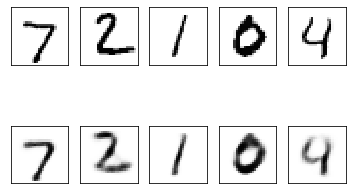

In [16]:
n = 5
for i in range(n):
    # instancias de prueba
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='Greys', interpolation='nearest')

    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # reconstrucción
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28,28),cmap='Greys', interpolation='nearest')
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



## Autoencoder Convolucional
- Los Autoencoders Convolucionales trabajan con capas convolucionales y pooling. Para el decoder se puede usar 'Conv2DTranspose'
- Los autoencoders variacionales generan nuevos datos. Los modelos generativos pueden tener muchas aplicaciones

In [17]:
from tensorflow.keras.layers import Input, LeakyReLU, Reshape, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, BatchNormalization, Conv2DTranspose
from tensorflow.keras.models import Model,Sequential
import tensorflow as tf

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255


In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In [20]:
def conv_ae():
    # encoder
    inputs = Input(shape=(28, 28, 1))
    x = Conv2D(16, 3, activation='relu', padding='same')(inputs)
    
    x = Conv2D(32, 3, activation='relu', padding='same')(x)
    
    x = Conv2D(64, 3, activation='relu', padding='same')(x)  
    x = MaxPooling2D(padding='same')(x)

    x = Conv2D(128, 3, activation='relu', padding='same')(x)
    x = MaxPooling2D(padding='same')(x)

    encoded = Conv2D(256, 3, activation='relu', padding='same')(x)
    
    
    # decoder
    x = Conv2DTranspose(256, 3, strides=(2, 2), activation='relu', padding='same')(encoded)
    x = Conv2DTranspose(128, 3, strides=(2, 2), activation='relu', padding='same')(x)
    x = Conv2DTranspose(64, 3, strides=(1, 1), activation='relu', padding='same')(x)
    x = Conv2DTranspose(32, 3, strides=(1, 1), activation='relu', padding='same')(x)
    x = Conv2DTranspose(16, 3, strides=(1, 1), activation='relu', padding='same')(x)
    decoded = Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)
    

    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', 
                        loss='binary_crossentropy')
    return autoencoder
  

autoencoder = conv_ae()

In [21]:
autoencoder.fit(x_train, x_train, epochs=1)

Train on 60000 samples
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.0734


In [22]:
decoded_imgs = autoencoder.predict(x_test[:5])

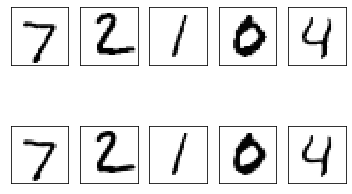

In [23]:
n = 5
for i in range(n):
    # instancias de prueba
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='Greys', interpolation='nearest')

    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # reconstrucción
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28,28),cmap='Greys', interpolation='nearest')
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


- La reconstrucción de los datos es mucho mas potente con capas de convoluciones.

- Probar con diferente número de capas, neuronas y funciones de costo, argumentar los resultados de la reconstrucción

- Experimentar con otro dataset